# MyHealth - Machine Learning Model
##### Automate the process of medical fees based on historical data by performing a linear-regression practice to accurately estimate yearly costs.
Credits: FCC

## I. Analysis of Dataset

In [1]:
import pandas as pd 

In [2]:
medicalExpenses_df = pd.read_csv("dataset.csv")

In [3]:
medicalExpenses_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medicalExpenses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
import plotly.express as px

In [6]:
import matplotlib

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
ageVisualization = px.histogram(medicalExpenses_df, x="age", marginal="box", nbins=47, title="Relationship: Age to How Many")

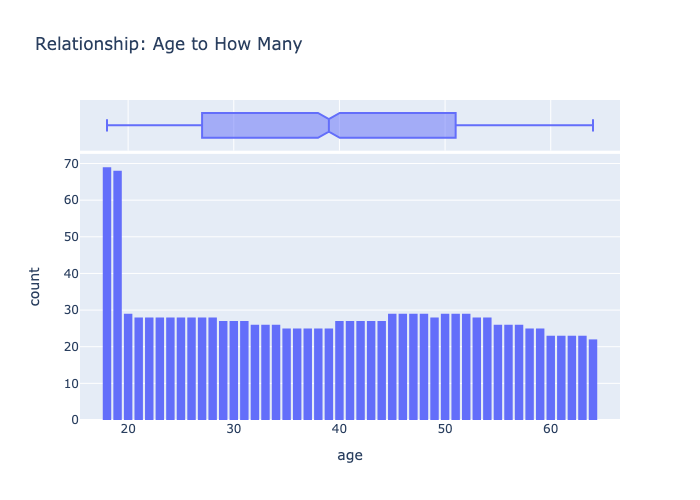

In [11]:
ageVisualization.update_layout(bargap=0.2)
ageVisualization.show("png")

Note: Seems uniform, only outliers are the 18 & 19 age groups, showing almost double the other groups. Important to consider when checking accuracy of model on these 2 age groups versus the rest.

In [18]:
chargeVisualization = px.scatter(medicalExpenses_df, x='age', y='charges', color='smoker', opacity=0.8)

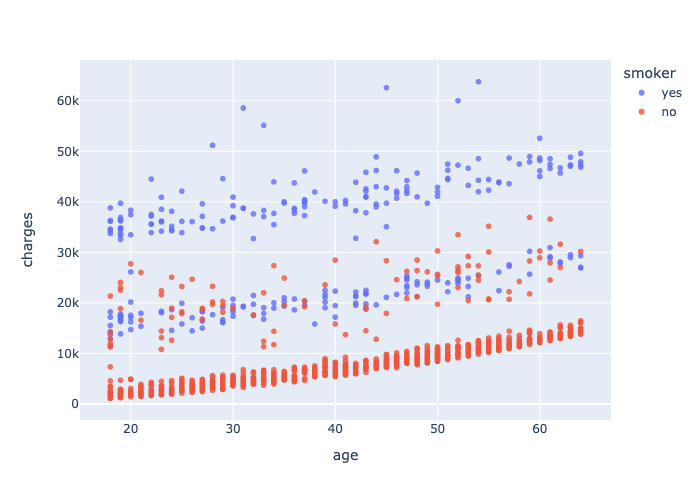

In [19]:
chargeVisualization.show("png")

Note: Dataset is accurate in terms of historical data with smokers vs nonsmokers --> (high expenditures). Linear clusters seen with proportional relationships in age vs expenses. Seems like a smokers could be handled based on the usage of cigarettes per day (heavy smokers vs light smokers). 

In [33]:
bmiVisualization = px.scatter(medicalExpenses_df, x='charges', y='bmi', color='smoker')

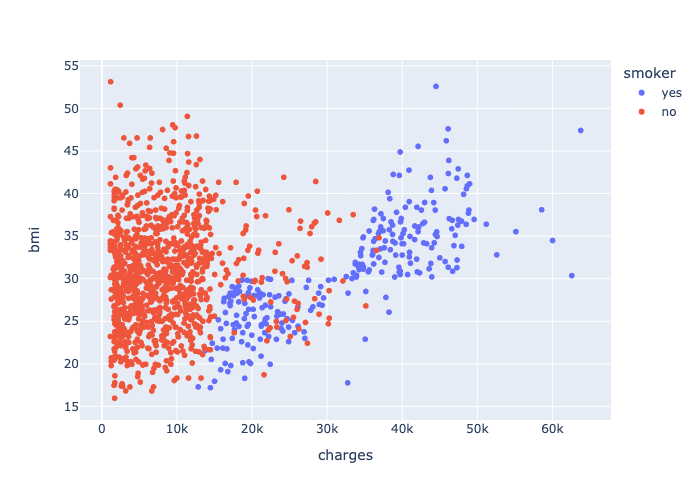

In [34]:
bmiVisualization.show("png")

Note: Seems relationship is generally random with the exception that smokers above the BMI of 30 have a spike in expenses.

In [56]:
smokerNumeric = {'no': 0, 'yes': 1}
smokercorr = medicalExpenses_df.smoker.map(smokerNumeric)
medicalExpenses_df.charges.corr(smokercorr)

0.7872514304984778

In [58]:
genderNumeric = {'female': 0, 'male': 1}
gendercorr = medicalExpenses_df.sex.map(genderNumeric)
medicalExpenses_df.charges.corr(gendercorr)

0.05729206220202533

In [60]:
medicalExpenses_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

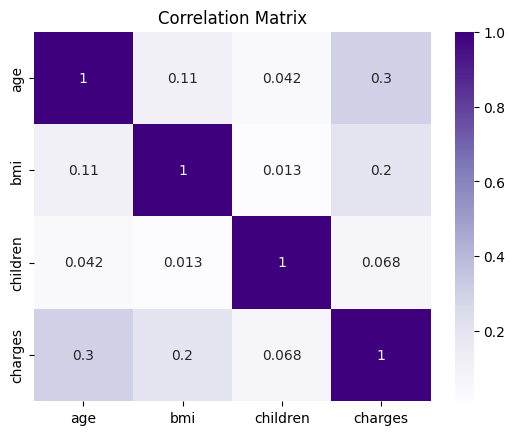

In [66]:
sns.heatmap(medicalExpenses_df.corr(numeric_only=True), cmap="Purples", annot=True)

plt.title("Correlation Matrix")

Note: Can clearly see through the heatmap that charges is most closely related to age when comparing numeric only coloumns in the dataset.

## II. Linear Regression V1